In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_context('talk')
mpl.rcParams['figure.figsize'] = [12,6]

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
df = pd.read_csv('Data/insurance - insurance.csv')
# display info and .head
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
## Separate the 2 groups into 2 varaibles
grp_yes = df.loc[ df['smoker']=='yes']
grp_yes
grp_no = df.loc[ df['smoker']!='yes']
grp_no

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [7]:
smoker_charge = grp_yes['charges']

In [8]:
non_smoker_charge = grp_no['charges']

In [10]:
## check yes group for outliers using z-score >3 rule.
idx_outliers_yes = np.abs(stats.zscore(smoker_charge)) > 3
idx_outliers_yes.sum()

0

In [11]:
## check no group for outliers using z-score >3 rule.
idx_outliers_no = np.abs(stats.zscore(non_smoker_charge)) > 3
idx_outliers_no.sum()

24

In [12]:
stats.normaltest(non_smoker_charge)

NormaltestResult(statistic=316.4528082392722, pvalue=1.9193129759002216e-69)

In [13]:
stats.normaltest(smoker_charge)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [14]:
stats.levene(non_smoker_charge, smoker_charge)

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

In [23]:
stats.ttest_ind(non_smoker_charge,smoker_charge)


Ttest_indResult(statistic=-46.66492117272371, pvalue=8.271435842179102e-283)

In [24]:
result = stats.levene(non_smoker_charge,smoker_charge)
result

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

In [25]:
## is our result significant
print(f"p-value={result.pvalue:.10f}")
print(f"Significant: {result.pvalue <.05}")


p-value=0.0000000000
Significant: True


ValueError: Could not interpret value `non_smoker_charge` for parameter `x`

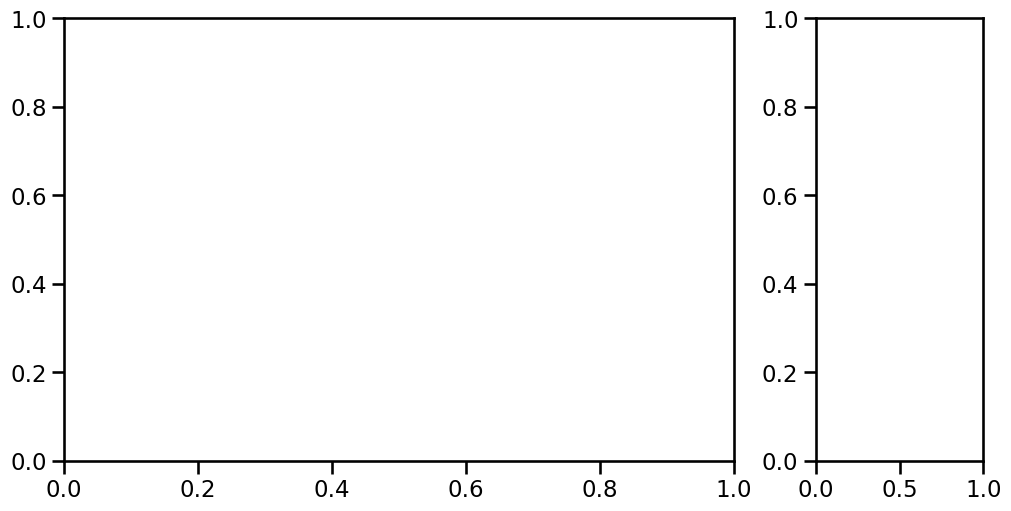

In [20]:
smoker_palette={'Male':'dodgerblue', "Female":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='non_smoker_charge',fill=True,hue='Gender',kde=True,
                  stat='density',common_norm=False,ax=ax)

ax.axvline(np.mean(male_height), ls='--',lw=3, 
           label=f"Males (Mean={np.mean(male_height):.2f})",color=gender_palette['Male'])

ax.axvline(np.mean(female_height), ls='--', lw=3, 
           label=f"Females (Mean={np.mean(female_height):.2f})",color=gender_palette['Female'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=sample, x='non_smoker_charge',y='smoker_charge',ax = ax_bar,palette=gender_palette)
fig.suptitle('Comparison of Height by Gender',fontsize='xx-large');

NameError: name 'xs' is not defined

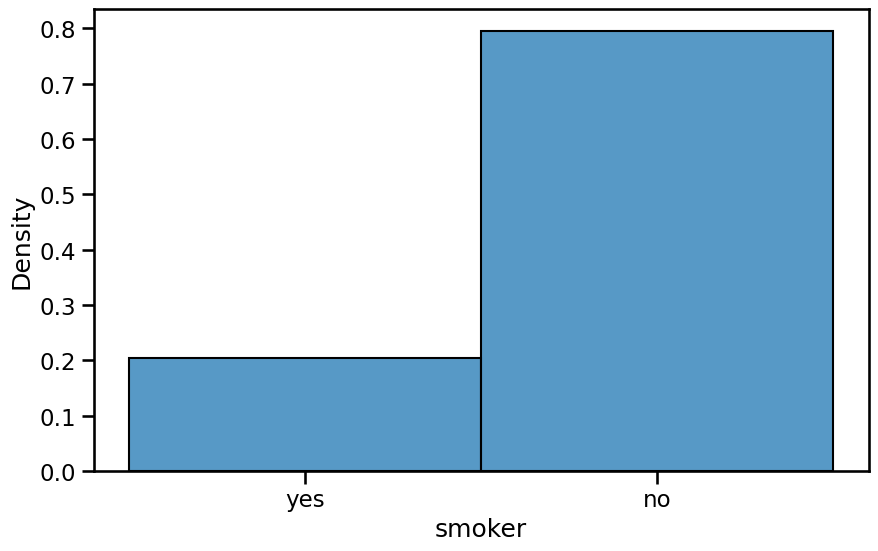

In [21]:
## Plot the histogram again AND pdf again
## Plot the histogram again AND pdf again
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(data=df, x='smoker', stat='density')
plt.plot(xs,pdf, color='red', label='pdf')
ax.set_title('probability Distrbution')
## Add a vpsan to the plot showing the region we want to calc prob for
plt.axvspan(1, 31, alpha=0.6, color='orange', zorder=0)
plt.legend();